# First Autoencoder  

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42) 

## Data 생성
- 3 차원 data 생성

In [2]:
m = 100
# 
angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5  # 0에서 3사이의 난수가 100개 생성
data = np.empty((m, 3)) # 특별한 값 없이 메모리상에 100x3짜리 빈 데이터 array 만들기
data[:,0] = np.cos(angles) + np.sin(angles)/2 + 0.1 * np.random.randn(m)/2
data[:,1] = np.sin(angles) * 0.7 + 0.1 * np.random.randn(m) / 2
data[:,2] = data[:, 0] * 0.1 + data[:, 1] * 0.3 + 0.1 * np.random.randn(m)
data.shape

(100, 3)

- 3차원 data 시각화

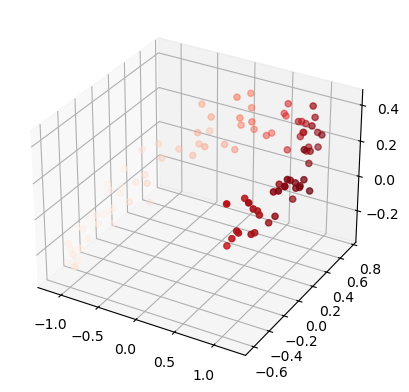

In [3]:
X_train = data

ax = plt.axes(projection = "3d") # 3차원 축이 생김

# 1,2,3차원 축을 그려준다
ax.scatter(X_train[:,0], X_train[:,1], X_train[:,2], c = X_train[:,0], cmap = 'Reds')

## Autoencoder model 작성

- 3 차원 data 를 2 차원으로 차원 축소

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

인코더, 디코더 만드는 목적 : 차원을 축소하는게 목적 
-  오토 인코더에서는 인코더가 중요 --> 디코더는 인코더를 훈련시키기 위한 목적으로 있음
-  나중에 인코더만 따로 사용할 수 있기 때문에 보통 인코더와 디코더를 구분해서 만든다. 

## encoder, decoder 각각 정의

In [5]:
encoder = Sequential([Dense(2, input_shape = (3,))])
# Sequential 모델과 따로 정의했기 때문에 input_shape을 줘야함 ! 지금은 알아서 계산할 수 없음
decoder = Sequential([Dense(3, input_shape = (2,))]) 
# 아래 코드는 sequential()안에 같이 존재하기 때문에 마지막엔 input_shape을 안 줫음

autoencoder = Sequential([encoder, decoder])
autoencoder.summary()

C:\Users\esroh\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 2)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 3)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17 (68.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)

## encoder, decoder로 정의 X

In [6]:
model = keras.models.Sequential([
    # 3차원으로 들어온 입력을 2차원으로 차원 축소 
    Dense(2, input_shape=(3,)), # 여러 차원이 들어올 수 있기 때문에 input으로 받음 
    # 다시 3차원으로 복원 
    Dense(3)
])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 2)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17 (68.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
autoencoder.compile(loss="mse", optimizer = keras.optimizers.SGD(learning_rate = 0.1))

In [8]:
history = autoencoder.fit(X_train, X_train, epochs = 500) # 자기 자신을 정답 데이터로 사용함 

Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.4508 
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1547
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1045
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0919 
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0861 
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0815 
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0714
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0685
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0682
Epoch 10/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0634
Epoch 11/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0636
Epoch 12/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0568 
Epoch 13/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0524 
Epoch 14/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0531
Epoch 15/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0508
Epoch 16/500
4/4 ━━━━━━━━━━

In [9]:
encodings = encoder.predict(X_train)
encodings 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


array([[-0.57108754, -0.45471725],
       [ 0.36715215,  0.7672914 ],
       [-0.1834564 ,  0.8340772 ],
       [-0.6867321 ,  0.66130877],
       [-0.05633021, -0.9351254 ],
       [ 0.03479983, -1.017852  ],
       [ 0.37686276, -1.0480279 ],
       [ 0.16580494,  0.95300466],
       [-0.4701089 ,  0.44449234],
       [-0.35091016,  0.9266658 ],
       [ 0.3629792 , -0.8400605 ],
       [ 0.5201485 ,  0.5985467 ],
       [ 0.16232798,  0.88988787],
       [-0.13327485, -0.9344243 ],
       [-0.08788512, -0.94458187],
       [-0.16138516, -0.9420973 ],
       [-0.4725681 , -0.6289939 ],
       [-0.5435854 ,  0.14992231],
       [-0.6362496 , -0.19820876],
       [-0.45726627, -0.6245327 ],
       [-0.4372993 ,  0.46872118],
       [ 0.02707607, -0.9787224 ],
       [-0.40215775, -0.7598417 ],
       [-0.49204606, -0.51564837],
       [-0.68702495,  0.007412  ],
       [-0.0776696 ,  0.95424384],
       [-0.2027584 , -0.91147935],
       [-0.67667085,  0.18824907],
       [-0.47001213,

In [10]:
encodings.shape

(100, 2)

## encoder output 시각화

- 학습시킨 encoder 를 이용하여 data를 차원 축소

- encoder output을 시각화
- 3차원 데이터가 2차원 데이터로 매핑되었음

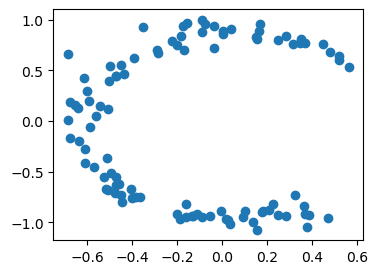

In [11]:
fig = plt.figure(figsize=(4,3))
plt.scatter(encodings[:,0], encodings[:,1])

## Decoder 를 이용한 data 복원

- 학습된 decoder를 이용하여 data 복원

In [12]:
decodings = decoder.predict(encodings)
decodings

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


array([[ 7.87853837e-01,  6.67085409e-01,  2.81940073e-01],
       [-1.08275604e+00, -4.36040372e-01, -2.23997355e-01],
       [-8.83185685e-01,  1.21713281e-01, -4.17483859e-02],
       [-4.32874084e-01,  6.58249557e-01,  1.59032553e-01],
       [ 1.08017886e+00,  1.93430796e-01,  1.72692806e-01],
       [ 1.12926948e+00,  1.09311864e-01,  1.53012529e-01],
       [ 9.92323697e-01, -2.38483399e-01,  3.81363072e-02],
       [-1.19458020e+00, -2.50519216e-01, -1.80943772e-01],
       [-2.93072522e-01,  4.60597992e-01,  1.15201041e-01],
       [-9.05305088e-01,  2.83077270e-01,  3.10629979e-03],
       [ 7.61001348e-01, -2.48002082e-01,  1.25593953e-02],
       [-9.66129363e-01, -5.73852658e-01, -2.52671123e-01],
       [-1.12051904e+00, -2.39733368e-01, -1.70499355e-01],
       [ 1.11795783e+00,  2.72360712e-01,  1.99423686e-01],
       [ 1.10683644e+00,  2.26913810e-01,  1.85080320e-01],
       [ 1.14084482e+00,  3.02102774e-01,  2.10349098e-01],
       [ 9.38135207e-01,  5.85844755e-01

In [13]:
decodings.shape # 2차원 데이터가 다시 3차원 데이터로 복원됨

(100, 3)

- 복원된 data 시각화

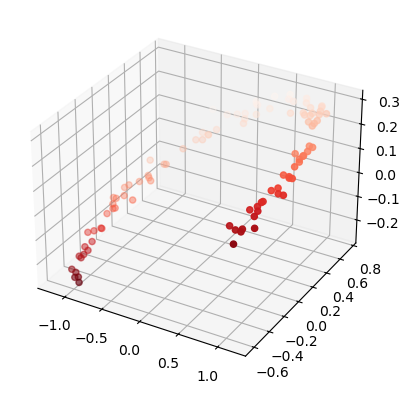

In [14]:
ax = plt.axes(projection = '3d')
ax.scatter(decodings[:,0], decodings[:,1], decodings[:,2], c = encodings[:,0], cmap = "Reds")